In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from keras.preprocessing import text_dataset_from_directory
import tensorflow as tf

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Hsoub/L10'
labels = os.listdir(data_path)
batch_size =64
raw_data = text_dataset_from_directory(
    directory=data_path,
    batch_size= batch_size,
)

Found 45500 files belonging to 7 classes.


In [ ]:
print("Article classes are:\n",raw_data.class_names)
num_classes= len(raw_data.class_names)

Article classes are:
 ['Culture', 'Finance', 'Medical', 'Politics', 'Religion', 'Sports', 'Tech']


In [ ]:
X=[]
y_labels=[]
y=[]
for text_batch, label_batch in raw_data:

    text_batch=text_batch.numpy()
    label_batch=label_batch.numpy()

    for i in range(len(text_batch)):

        text=text_batch[i].decode("utf-8")

        X.append(text)

        c_index=label_batch[i]
        y.append(c_index)
        class_label = raw_data.class_names[c_index]
        y_labels.append(class_label)
print(len(X))
print(len(y))

45500
45500


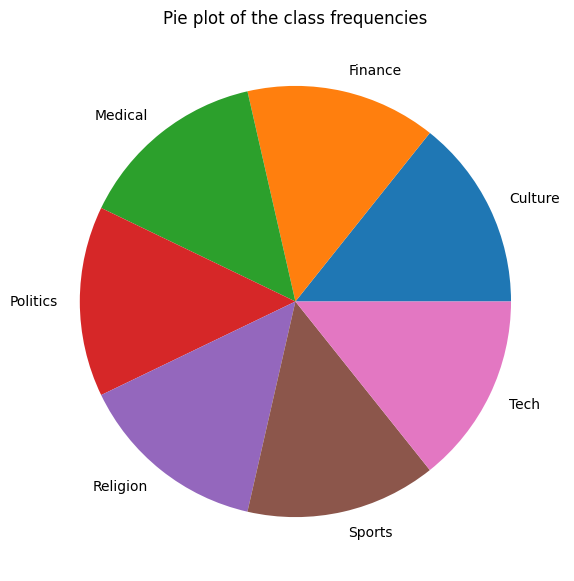

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

unique, counts = np.unique(y_labels, return_counts=True)
plt.figure("classe Pie", figsize=(7, 7))
plt.title("Pie plot of the class frequencies")
plt.pie(counts, labels=unique)

plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

listStopwords = stopwords.words('arabic')
def cleanText(text):
    numbers="0123456789"
    arabic_punctuation='''`÷«»×؛<>_()*^ـ،/:"؟.,'~¦+|!”…“–ـ'''
    english_punctuation=string.punctuation
    del_chars=english_punctuation+arabic_punctuation+numbers
    for char in del_chars:
        text = text.replace(char, " ")
    text = text.strip(' ')
    tokens_list=word_tokenize(text)
    filtered = []
    for txt in tokens_list:
        if txt not in listStopwords:
            filtered.append(txt)
    text = ' '.join(filtered)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import random
import numpy as np
import tensorflow as tf
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [ ]:
import random
samples=10000

random_indices = random.sample(range(len(X)), samples)

X = [X[i] for i in random_indices]
y = [y[i] for i in random_indices]

In [ ]:
X[1]

'أجرى الفريق الطبي لمبادرة «نبضات» التي تقيمها مؤسسة محمد بن راشد آل مكتوم للأعمال الخيرية والإنسانية بالتعاون مع هيئة الصحة بدبي، أكثر من 75 عملية قلب مختلفة لأطفال سودانيين تتراوح أعمارهم بين 3 أشهر وحتى 15 سنة.وكان الفريق الطبي لنبضات الذي يضم 22 فرداً من المتخصصين في جراحة قلب الأطفال والاستشاريين والعناية المركزة والفنيين والممرضين، وصل إلى الخرطوم مساء السبت الماضي في مهمة إنسانية يجري خلالها عدداً من العمليات الجراحية المعقدة في مجال جراحات القلب المفتوح والقسطرة العلاجية لعلاج التشوهات الخلقية لدى الأطفال، وأمراض الصمامات والشرايين القلبية، وتوجه مباشرة إلى مدينة ودمدني التي تقع جنوب الخرطوم، حيث تُجرى العمليات في مركز ودمدني لأمراض وجراحة القلب.وقال صالح زاهر مدير مؤسسة محمد بن راشد آل مكتوم للأعمال الخيرية والإنسانية إن هذه هي المهمة الإنسانية الثالثة التي تنفذها مبادرة «نبضات» في السودان.. موضحاً أن المؤسسة تقوم بتغطية كافة تكاليف العمليات المقرر إجراؤها ضمن زيارة الفريق الطبي للسودان، وتوفير كافة عمليات الدعم اللوجستي الضرورية لإنجاح مهمتهم في علاج أكبر عدد ممكن من الأطفال 

In [ ]:
X = [cleanText(text) for text in X]
X[1]

'أجرى الفريق الطبي لمبادرة نبضات تقيمها مؤسسة محمد بن راشد آل مكتوم للأعمال الخيرية والإنسانية بالتعاون هيئة الصحة بدبي عملية قلب مختلفة لأطفال سودانيين تتراوح أعمارهم أشهر وحتى سنة وكان الفريق الطبي لنبضات يضم فرداً المتخصصين جراحة قلب الأطفال والاستشاريين والعناية المركزة والفنيين والممرضين وصل الخرطوم السبت الماضي مهمة إنسانية يجري خلالها عدداً العمليات الجراحية المعقدة مجال جراحات القلب المفتوح والقسطرة العلاجية لعلاج التشوهات الخلقية الأطفال وأمراض الصمامات والشرايين القلبية وتوجه مباشرة مدينة ودمدني تقع جنوب الخرطوم تُجرى العمليات مركز ودمدني لأمراض وجراحة القلب وقال صالح زاهر مدير مؤسسة محمد بن راشد آل مكتوم للأعمال الخيرية والإنسانية المهمة الإنسانية الثالثة تنفذها مبادرة نبضات السودان موضحاً المؤسسة تقوم بتغطية كافة تكاليف العمليات المقرر إجراؤها ضمن زيارة الفريق الطبي للسودان وتوفير كافة عمليات الدعم اللوجستي الضرورية لإنجاح مهمتهم علاج أكبر عدد ممكن الأطفال مدار الفترة ستمتد الثامن الأول الجاري وأضاف حملة السودان تهدف علاج طفلاً مريضاً مصاباً بتشوهات خلقية الفئات المعوزة توج

In [ ]:
#https://huggingface.co/asafaya

In [ ]:
#https://sparknlp.org/2022/04/11/bert_embeddings_bert_base_arabic_ar_3_0.html

In [ ]:
#https://huggingface.co/asafaya/bert-base-arabic

In [ ]:
bert_model_name="asafaya/bert-base-arabic"

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained(bert_model_name)


In [ ]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained(bert_model_name)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
X_bert_dict = tokenizer(X, return_tensors="tf", padding=True, truncation=True, max_length = 128)
X_bert_dict

{'input_ids': <tf.Tensor: shape=(10000, 128), dtype=int32, numpy=
array([[    2,  1909,  2603, ...,  3868, 26567,     3],
       [    2, 17558,  4062, ..., 14191,  1719,     3],
       [    2,  4523,  4852, ...,     0,     0,     0],
       ...,
       [    2,  8740,  8283, ...,  8484,  6704,     3],
       [    2, 25647,  6378, ...,     0,     0,     0],
       [    2, 23321,  2217, ...,  6514,  3111,     3]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(10000, 128), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(10000, 128), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype

In [ ]:
tokens_ids=X_bert_dict["input_ids"].numpy()
tokens_ids

array([[    2,  1909,  2603, ...,  3868, 26567,     3],
       [    2, 17558,  4062, ..., 14191,  1719,     3],
       [    2,  4523,  4852, ...,     0,     0,     0],
       ...,
       [    2,  8740,  8283, ...,  8484,  6704,     3],
       [    2, 25647,  6378, ...,     0,     0,     0],
       [    2, 23321,  2217, ...,  6514,  3111,     3]], dtype=int32)

In [ ]:
X_embeddings_list = []
for i in range(0, len(tokens_ids), batch_size):

    batch_segments = tokens_ids[i:i+batch_size]

    batch_segments_tf = tf.convert_to_tensor(batch_segments)

    dict={"input_ids": batch_segments_tf}

    embeddings = bert_model(dict)["last_hidden_state"]

    X_embeddings_list.append(embeddings)

In [ ]:

X_embeddings = tf.concat(X_embeddings_list, axis=0)

print("Shape of concatenated embeddings:", X_embeddings.shape)

Shape of concatenated embeddings: (10000, 128, 768)


In [ ]:
X_embeddings_np = X_embeddings.numpy()
y_np =np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_embeddings_np, y_np, random_state=42)

In [ ]:
from keras.layers import Input, Flatten, Dense,Dropout
from keras.models import Sequential
import tensorflow as tf

model = Sequential()

model.add(Input(shape=(X_embeddings_np.shape[1], X_embeddings_np.shape[2])))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 20

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test))


Epoch 1/20
118/118 [==============================] - 3s 24ms/step - loss: 1.6736 - accuracy: 0.8633 - val_loss: 1.2093 - val_accuracy: 0.9212
Epoch 2/20
118/118 [==============================] - 2s 13ms/step - loss: 0.4076 - accuracy: 0.9627 - val_loss: 0.7119 - val_accuracy: 0.9416
Epoch 3/20
118/118 [==============================] - 1s 12ms/step - loss: 0.2066 - accuracy: 0.9748 - val_loss: 2.0969 - val_accuracy: 0.9040
Epoch 4/20
118/118 [==============================] - 1s 13ms/step - loss: 0.2843 - accuracy: 0.9815 - val_loss: 0.7799 - val_accuracy: 0.9480
Epoch 5/20
118/118 [==============================] - 1s 12ms/step - loss: 0.3280 - accuracy: 0.9769 - val_loss: 1.1156 - val_accuracy: 0.9372
Epoch 6/20
118/118 [==============================] - 1s 12ms/step - loss: 0.2320 - accuracy: 0.9841 - val_loss: 0.9881 - val_accuracy: 0.9464
Epoch 7/20
118/118 [==============================] - 1s 12ms/step - loss: 0.4219 - accuracy: 0.9732 - val_loss: 1.4024 - val_accuracy: 0.9436

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print("Train Accuracy:", round(100*train_accuracy[-1],2))
print("Validation Accuracy:", round(100*val_accuracy[-1],2))


Train Accuracy: 99.47
Validation Accuracy: 94.76


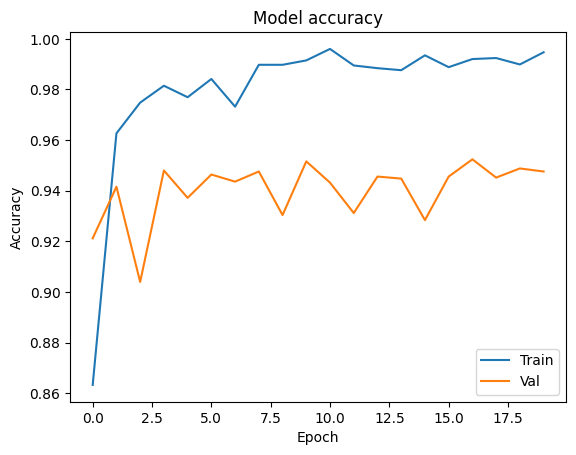

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

79/79 [==============================] - 0s 3ms/step


array([[2.4683242e-34, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        6.6807913e-34, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.9999994e-01],
       [5.2230464e-28, 0.0000000e+00, 0.0000000e+00, ..., 9.9999994e-01,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([6, 6, 4, ..., 0, 5, 4])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[332,   0,   2,   3,  22,   7,   3],
       [  1, 310,   0,   0,   0,   4,  10],
       [  4,   1, 320,   3,   2,   7,   8],
       [  2,   0,   4, 351,   1,   7,   1],
       [ 11,   1,   2,   3, 363,   2,   1],
       [  0,   0,   0,   0,   2, 350,   0],
       [  4,   3,   2,   0,   4,   4, 343]])

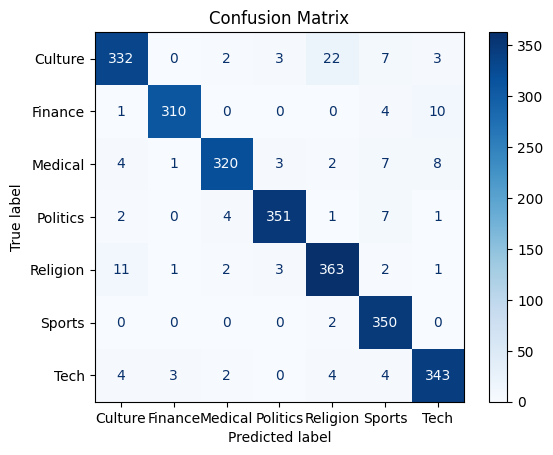

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=raw_data.class_names)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()
